In [1]:
"""Data inspection."""

'Data inspection.'

In [3]:
import importlib
import os

import glob
import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import vis
importlib.reload(vis)

import scipy.io

DATA_DIR = '/neuro/'
DATASET_PATH = os.path.join(DATA_DIR, 'connectomes_raphael')

string_base = '%s/*.mat' % DATASET_PATH
all_paths = glob.glob(string_base)
print(len(all_paths))

all_ts = []

for path in all_paths:
    ts_dict = scipy.io.loadmat(path)
    ts = ts_dict['TCSnf']
    all_ts.append(ts)
    
all_ts = np.array(all_ts)
print(all_ts.shape)


CMAP = 'Spectral'

100
(100, 360, 1190)


In [33]:
HCP_DATASET_PATH = '/neuro/HCP_PTN1200_recon2/node_timeseries/3T_HCP1200_MSMAll_d15_ts2'
print(HCP_DATASET_PATH)

string_base = '%s/*.txt' % HCP_DATASET_PATH

all_paths = glob.glob(string_base)

all_ts = []
for i, path in enumerate(all_paths):
    ts = np.loadtxt(path)
    all_ts.append(ts)
    
all_ts = np.array(all_ts)
print(all_ts.shape)

/neuro/HCP_PTN1200_recon2/node_timeseries/3T_HCP1200_MSMAll_d15_ts2
/neuro/HCP_PTN1200_recon2/node_timeseries/3T_HCP1200_MSMAll_d15_ts2/*.txt
812
(11, 4800, 15)


In [12]:
n_data = 10
n_areas = 360
all_connectomes = np.zeros((n_data, n_areas, n_areas))

for i_ts in range(n_data):
    for i_area in range(n_areas):
        for j_area in np.arange(i_area,  n_areas, 1):
            #print('i=', i_area)
            #print('j=', j_area)
            ts_of_area_i = all_ts[i_ts, i_area, :]
            ts_of_area_j = all_ts[i_ts, j_area, :]
            x = np.vstack([ts_of_area_i, ts_of_area_j])
            corr = np.corrcoef(x)[0, 1]
            #print(corr)
            all_connectomes[i_ts, i_area, j_area] = corr
            all_connectomes[i_ts, j_area, i_area] = corr
            
#np.save

In [6]:
print(all_connectomes[0])

[[1.         0.99960885 0.99943162 ... 0.99756771 0.995624   0.99749516]
 [0.99960885 1.         0.99942555 ... 0.99712415 0.99514793 0.99713361]
 [0.99943162 0.99942555 1.         ... 0.99784444 0.99590717 0.99775193]
 ...
 [0.99756771 0.99712415 0.99784444 ... 1.         0.9991131  0.99944235]
 [0.995624   0.99514793 0.99590717 ... 0.9991131  1.         0.99925584]
 [0.99749516 0.99713361 0.99775193 ... 0.99944235 0.99925584 1.        ]]


In [13]:
dataset = all_connectomes

print(dataset.shape)
print(np.min(dataset))
print(np.max(dataset))
datasets.is_spd(dataset)

(10, 360, 360)
-0.5846706008287029
1.0


True

In [1]:

import datasets
importlib.reload(datasets)
dataset, _ = datasets.get_dataset_connectomes((15, 15))


Using numpy backend


NameError: name 'importlib' is not defined

Dataset shape: (10, 360, 360)


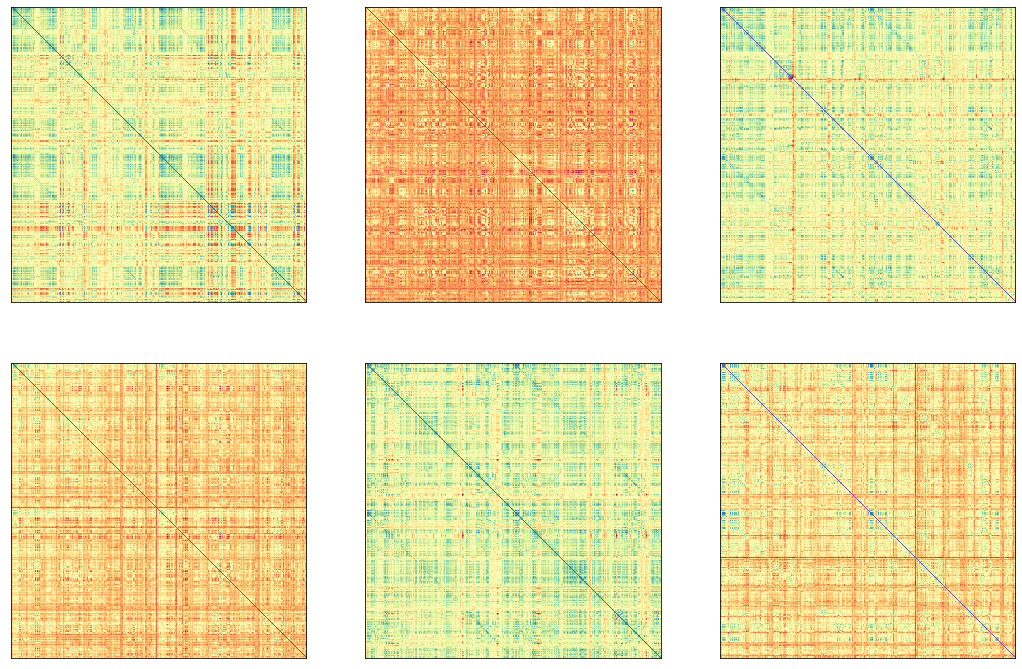

In [19]:
nrows=2
ncols=3
figsize=(18, 12) 
cmap='Spectral'

print('Dataset shape:', dataset.shape)

fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=figsize)
n_samples = nrows * ncols

for i_img, one_img in enumerate(dataset):
    if i_img > n_samples - 1:
        break
    if len(one_img.shape) == 3:
        one_img = one_img[0]  # channels
    ax = axes[int(i_img // ncols), int(i_img % ncols)]
    ax.imshow(one_img, cmap=cmap)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

From: https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

1. netmats1: Using "full" normalized temporal correlation between every node timeseries
and every other. This is a common approach and is very simple, but it has various
practical and interpretational disadvantages [Smith 2012].
2. netmats2: Using partial temporal correlation between nodes' timeseries. This aims to
estimate direct connection strengths better than achieved by full correlation. To slightly
improve the estimates of partial correlation coefficients, a small amount of L2
regularization is applied (setting rho=0.01 in the Ridge Regression netmats option in
FSLNets) [Smith OHBM 2014, FSLNets]. 

In [ ]:
dataset, _ = datasets.get_dataset_connectomes((15, 15))

In [3]:
print(dataset.shape)
print(np.min(dataset))
print(np.max(dataset))

(771, 1, 15, 15)
2.3284999932667082e-05
1.0


In [5]:
CORR_THRESH = 0.1

bools = np.zeros(len(dataset))
for i, mat in enumerate(dataset):
    #print(i)
    mat = mat[0]
    val, _ = np.linalg.eig(mat)
    bools[i] = min(val)
    
datasets.is_spd(dataset)

True

In [5]:
min(bools)

0.24000841472550466

In [3]:
print(DATASET.shape)
print(np.min(DATASET))
print(np.max(DATASET))

(649, 1, 15, 15)
2.3284999932667082e-05
1.0


In [7]:
import toylosses
import torch
DATASET = dataset
print(DATASET.shape)
toylosses.is_spd(torch.Tensor(DATASET[0, 0]))

(771, 1, 15, 15)


Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (771, 1, 15, 15)


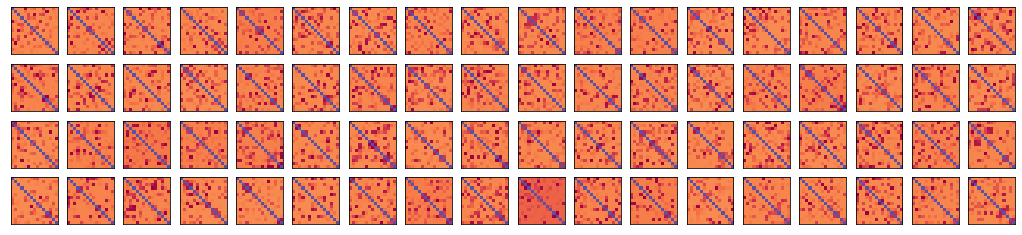

In [6]:
vis.show_data(DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_124_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_127_checkpoint.pth.


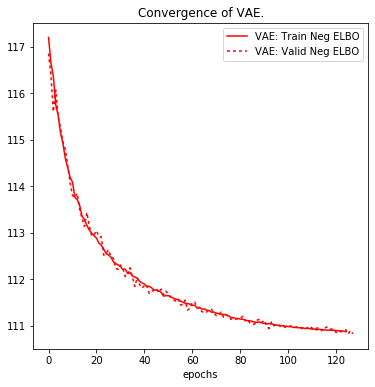

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_convergence(ax, OUTPUT, algo_name='vae', crit_name='neg_elbo')

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_159_checkpoint.pth.


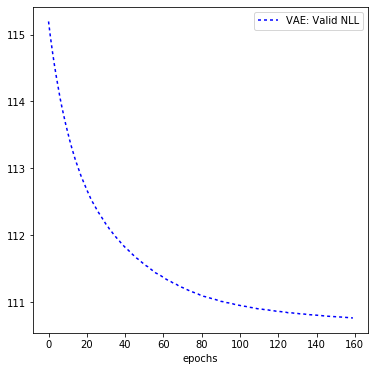

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_criterion(ax, OUTPUT, algo_name='vae', crit_name='neg_loglikelihood', mode='val', dashes=True)

Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (771, 1, 15, 15)
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_148_checkpoint.pth.
Loading encoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_148_checkpoint.pth.
Loading decoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_148_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>


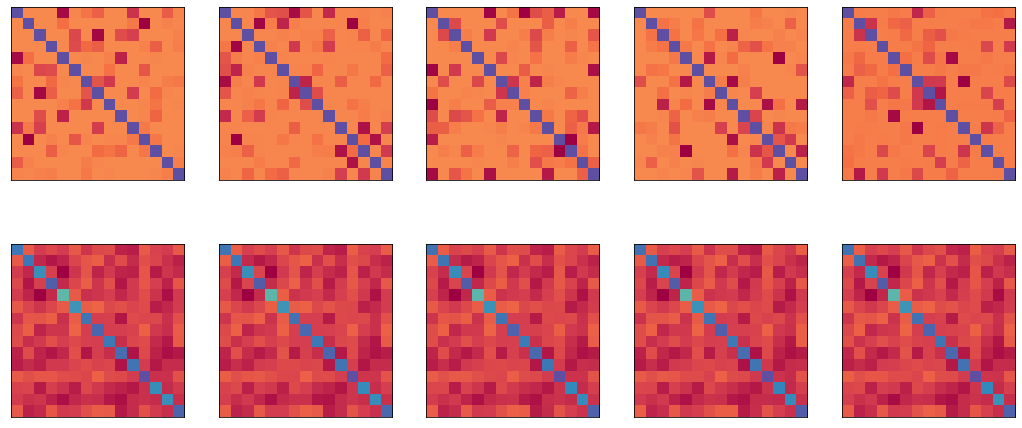

In [8]:
vis.show_img_and_recon(OUTPUT, DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_159_checkpoint.pth.
Loading decoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_159_checkpoint.pth.


/home/user/miniconda/envs/py36/lib/python3.7/site-packages/torch/tensor.py:339: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


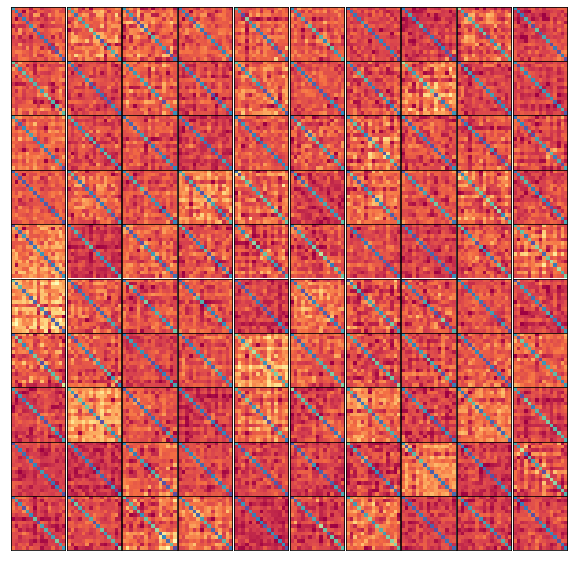

In [9]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)

for i, algo_name in enumerate(['vae']):
    vis.show_samples_from_prior(
        OUTPUT, fig, outer, i, algo_name=algo_name, cmap=CMAP)
fig.show()

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...


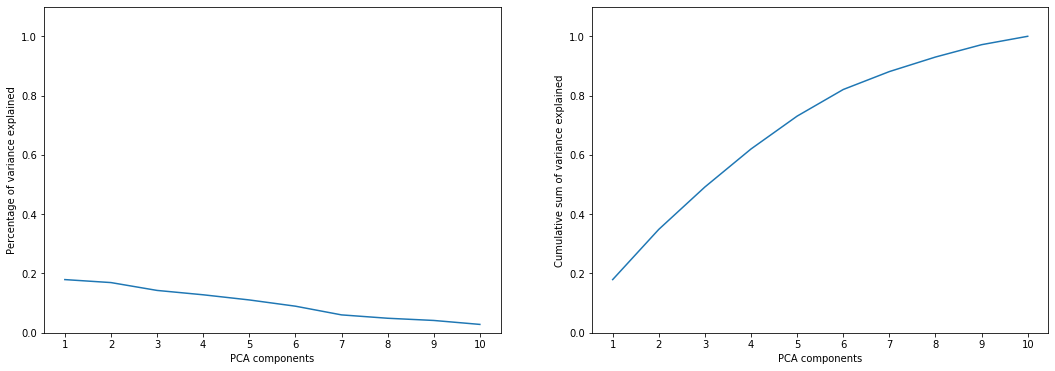

In [10]:
ax = vis.plot_variance_explained(OUTPUT, DATASET_PATH)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...


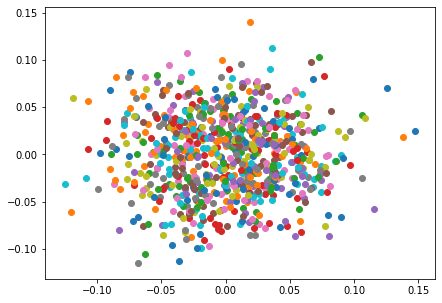

In [11]:
n_pcs = 2

mus = analyze.latent_projection(output=OUTPUT, dataset_path=DATASET_PATH)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])